In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import tz
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [3]:
crime = pd.read_csv('Crime_Data.csv')
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29448 entries, 0 to 29447
Data columns (total 8 columns):
RecordID        29448 non-null int64
Offense         29448 non-null object
IncidentID      29448 non-null int64
BlockNumber     28862 non-null float64
StreetName      29446 non-null object
Agency          29448 non-null object
DateReported    29448 non-null object
HourReported    29448 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 1.8+ MB


In [4]:
crime.head()

,RecordID,Offense,IncidentID,BlockNumber,StreetName,Agency,DateReported,HourReported
0,1001,Assist Citizen - Misc,201900020274,1600.0,MADISON AVE,CPD,2019-07-20T07:17:08.000Z,317
1,1002,Shots Fired/Illegal Hunting,201900020273,NaN,10TH ST NW / ANDERSON ST,CPD,2019-07-20T06:47:42.000Z,247
2,1003,Shots Fired/Illegal Hunting,201900020272,800.0,ROSE HILL DR,CPD,2019-07-20T06:25:22.000Z,225
3,1004,Suspicious Activity,201900020258,100.0,MADISON LN,CPD,2019-07-20T03:46:00.000Z,2346
4,1005,Vandalism,201900020252,800.0,W MAIN ST,CPD,2019-07-20T02:36:17.000Z,2236


In [5]:
crime.columns

Index(['RecordID', 'Offense', 'IncidentID', 'BlockNumber', 'StreetName',
       'Agency', 'DateReported', 'HourReported'],
      dtype='object')

In [6]:
# RecordID are all unique values, doesn't tell us anything
vals, counts = np.unique(crime['RecordID'], return_counts=True)
np.all(counts == 1)

True

In [7]:
# Agency is just CPD, doesn't tell us anything
np.unique(crime['Agency'])

array(['CPD'], dtype=object)

In [8]:
# IncidentID are all unique, doesn't tell us anything
vals, counts = np.unique(crime['IncidentID'], return_counts=True)
np.all(counts == 1)

True

In [9]:
# safe to remove RecordID, Agency, IncidentID
crime = crime.drop(columns=['RecordID', 'Agency', 'IncidentID'])

In [10]:
crime['BlockString'] = crime['BlockNumber'].apply(lambda x: '' if np.isnan(x) else int(x))
crime['Address'] = crime['BlockString'].astype(str)+' '+crime['StreetName']+', Charlottesville VA'
crime.to_csv('crime_data-addresses.csv', columns=['Address'])

In [11]:
vals, counts = np.unique(crime['Offense'], return_counts=True)
sorted(list(zip(vals, counts)), key=lambda x: x[1])

[('Alarm - Intentional', 1),
 ('Alarm - True', 1),
 ('Alarm - Unknown', 1),
 ('Alarm - Weather Related', 1),
 ('Assist', 1),
 ('Child Abuse', 1),
 ('Curfew/Loitering/Vagrancy', 1),
 ('Field Interview', 1),
 ('Fire Alarm - No Fire', 1),
 ('Impersonating a Police Officer', 1),
 ('Prostitution-assisting/promoting', 1),
 ('Traffic - Abandoned Vehicle', 1),
 ('Alarm-Accidental', 2),
 ('Civil Problem', 2),
 ('Open Door/Window', 2),
 ('Prostitution', 2),
 ('Sex Offense-statutory rape', 2),
 ('Tactical Crime Initiative - TCI', 2),
 ('Bad Check', 3),
 ('Fraud-welfare', 3),
 ('Noise Complaint', 3),
 ('Suspicious Vehicle', 3),
 ('Assisted on Prev Reported', 4),
 ('Attemped Suicide', 4),
 ('Computer Crime', 4),
 ('False Report of Crime', 4),
 ('Sex Offense - Assault w/Object', 4),
 ('Solicitation illegal w/o permit', 4),
 ('Crisis Assessment', 5),
 ('Fireworks Violation', 5),
 ('Traffic - Traffic Hazard', 5),
 ('Homicide-murder/non-negligent', 7),
 ('Identity Theft', 7),
 ('Larceny - From Coin Ope

In [12]:
# converted addresses to latlong using separate program ArcGIS Pro, reading the output here
crime_arcgis = pd.read_csv('crime_data-arcgis-output.csv')
crime['X'], crime['Y'] = crime_arcgis['X'], crime_arcgis['Y']
crime.head()

,Offense,BlockNumber,StreetName,DateReported,HourReported,BlockString,Address,X,Y
0,Assist Citizen - Misc,1600.0,MADISON AVE,2019-07-20T07:17:08.000Z,317,1600,"1600 MADISON AVE, Charlottesville VA",-78.486731,38.041532
1,Shots Fired/Illegal Hunting,NaN,10TH ST NW / ANDERSON ST,2019-07-20T06:47:42.000Z,247,,"10TH ST NW / ANDERSON ST, Charlottesville VA",-78.502296,38.036433
2,Shots Fired/Illegal Hunting,800.0,ROSE HILL DR,2019-07-20T06:25:22.000Z,225,800,"800 ROSE HILL DR, Charlottesville VA",-78.469232,38.022255
3,Suspicious Activity,100.0,MADISON LN,2019-07-20T03:46:00.000Z,2346,100,"100 MADISON LN, Charlottesville VA",-78.492631,38.036610
4,Vandalism,800.0,W MAIN ST,2019-07-20T02:36:17.000Z,2236,800,"800 W MAIN ST, Charlottesville VA",-78.490886,38.031661


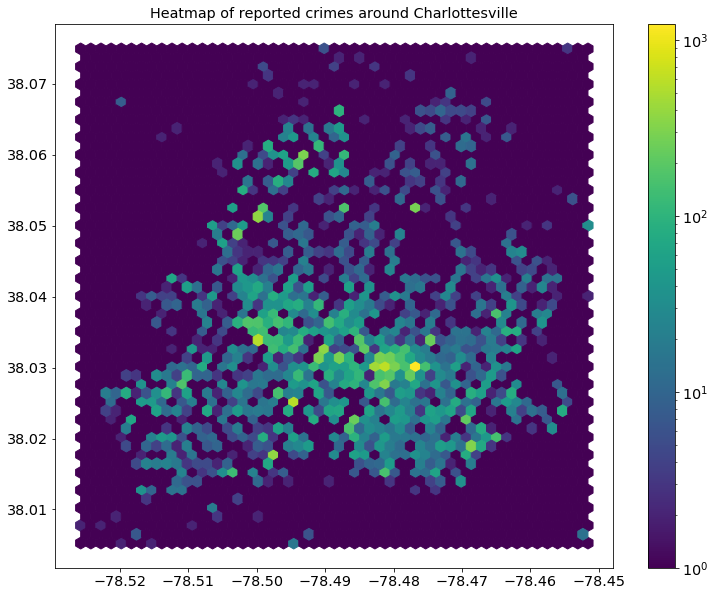

In [13]:
Xmin = -78.53
Xmax = -78.45
Ymin = 38.005
Ymax = 38.075
# 37.978503, -78.556730 left bottom
# 38.103614, -78.427396 right top
crime = crime[crime.X > Xmin]
crime = crime[crime.X < Xmax]
crime = crime[crime.Y > Ymin]
crime = crime[crime.Y < Ymax]

plt.figure(figsize=(12.5, 10))
plt.hexbin(crime.X, crime.Y, gridsize=50, bins='log')
plt.title('Heatmap of reported crimes around Charlottesville')
plt.colorbar()
plt.savefig('crime_data-heatmap-austin')

In [14]:
vals, counts = np.unique(crime.Y, return_counts=True)

In [15]:
vals[counts.argmax()]

38.03030194

In [16]:
vals, counts = np.unique(crime.Address.astype(str), return_counts=True)

In [17]:
sorted(list(zip(vals, counts)), key=lambda x: x[1], reverse=True)
# 600 E Market Street seems to have something going on...

[('600 E MARKET ST, Charlottesville VA', 1113),
 ('700 PROSPECT AVE, Charlottesville VA', 510),
 ('1100 5TH ST SW, Charlottesville VA', 360),
 ('800 HARDY DR, Charlottesville VA', 345),
 ('400 GARRETT ST, Charlottesville VA', 311),
 ('1100 EMMET ST N, Charlottesville VA', 309),
 ('1400 MELBOURNE RD, Charlottesville VA', 284),
 ('800 W MAIN ST, Charlottesville VA', 283),
 ('500 PARK ST, Charlottesville VA', 237),
 ('1400 HAMPTON ST, Charlottesville VA', 228),
 ('1500 UNIVERSITY AVE, Charlottesville VA', 214),
 ('900 1ST ST S, Charlottesville VA', 200),
 ('900 EMMET ST N, Charlottesville VA', 198),
 ('500 W MAIN ST, Charlottesville VA', 194),
 ('1900 EMMET ST N, Charlottesville VA', 186),
 ('200 W WATER ST, Charlottesville VA', 183),
 ('1400 UNIVERSITY AVE, Charlottesville VA', 172),
 ('1500 DAIRY RD, Charlottesville VA', 169),
 ('200 E MAIN ST, Charlottesville VA', 165),
 ('200 W MAIN ST, Charlottesville VA', 164),
 ('1300 CARLTON AVE, Charlottesville VA', 157),
 ('100 LANKFORD AVE, Cha

In [18]:
crime['TimeReported'] = crime['DateReported'].apply(lambda dt_string: datetime.strptime(dt_string, "%Y-%m-%dT%H:%M:%S.000Z"))
crime.head()

,Offense,BlockNumber,StreetName,DateReported,HourReported,BlockString,Address,X,Y,TimeReported
0,Assist Citizen - Misc,1600.0,MADISON AVE,2019-07-20T07:17:08.000Z,317,1600,"1600 MADISON AVE, Charlottesville VA",-78.486731,38.041532,2019-07-20 07:17:08
1,Shots Fired/Illegal Hunting,NaN,10TH ST NW / ANDERSON ST,2019-07-20T06:47:42.000Z,247,,"10TH ST NW / ANDERSON ST, Charlottesville VA",-78.502296,38.036433,2019-07-20 06:47:42
2,Shots Fired/Illegal Hunting,800.0,ROSE HILL DR,2019-07-20T06:25:22.000Z,225,800,"800 ROSE HILL DR, Charlottesville VA",-78.469232,38.022255,2019-07-20 06:25:22
3,Suspicious Activity,100.0,MADISON LN,2019-07-20T03:46:00.000Z,2346,100,"100 MADISON LN, Charlottesville VA",-78.492631,38.036610,2019-07-20 03:46:00
4,Vandalism,800.0,W MAIN ST,2019-07-20T02:36:17.000Z,2236,800,"800 W MAIN ST, Charlottesville VA",-78.490886,38.031661,2019-07-20 02:36:17


In [19]:
# convert from UTC back to local time
# taken from https://stackoverflow.com/questions/4770297/convert-utc-datetime-string-to-local-datetime
def to_local(utc):
    from_zone = tz.gettz('UTC')
    to_zone = tz.gettz('America/New_York')
    utc = utc.replace(tzinfo=from_zone)
    return utc.astimezone(to_zone)

crime['LocalTimeReported'] = crime['TimeReported'].apply(to_local)
crime.head()

,Offense,BlockNumber,StreetName,DateReported,HourReported,BlockString,Address,X,Y,TimeReported,LocalTimeReported
0,Assist Citizen - Misc,1600.0,MADISON AVE,2019-07-20T07:17:08.000Z,317,1600,"1600 MADISON AVE, Charlottesville VA",-78.486731,38.041532,2019-07-20 07:17:08,2019-07-20 03:17:08-04:00
1,Shots Fired/Illegal Hunting,NaN,10TH ST NW / ANDERSON ST,2019-07-20T06:47:42.000Z,247,,"10TH ST NW / ANDERSON ST, Charlottesville VA",-78.502296,38.036433,2019-07-20 06:47:42,2019-07-20 02:47:42-04:00
2,Shots Fired/Illegal Hunting,800.0,ROSE HILL DR,2019-07-20T06:25:22.000Z,225,800,"800 ROSE HILL DR, Charlottesville VA",-78.469232,38.022255,2019-07-20 06:25:22,2019-07-20 02:25:22-04:00
3,Suspicious Activity,100.0,MADISON LN,2019-07-20T03:46:00.000Z,2346,100,"100 MADISON LN, Charlottesville VA",-78.492631,38.036610,2019-07-20 03:46:00,2019-07-19 23:46:00-04:00
4,Vandalism,800.0,W MAIN ST,2019-07-20T02:36:17.000Z,2236,800,"800 W MAIN ST, Charlottesville VA",-78.490886,38.031661,2019-07-20 02:36:17,2019-07-19 22:36:17-04:00


In [20]:
def to_seconds(timestamp):
    return timestamp.hour*3600 + timestamp.minute*60 + timestamp.second
crime['SecondOfDay'] = crime['LocalTimeReported'].apply(to_seconds)
crime['Time_cos'] = crime['SecondOfDay'].apply(lambda x: np.cos(2*np.pi*x / 86400))
crime['Time_sin'] = crime['SecondOfDay'].apply(lambda x: np.sin(2*np.pi*x / 86400))
crime.head()

,Offense,BlockNumber,StreetName,DateReported,HourReported,BlockString,Address,X,Y,TimeReported,LocalTimeReported,SecondOfDay,Time_cos,Time_sin
0,Assist Citizen - Misc,1600.0,MADISON AVE,2019-07-20T07:17:08.000Z,317,1600,"1600 MADISON AVE, Charlottesville VA",-78.486731,38.041532,2019-07-20 07:17:08,2019-07-20 03:17:08-04:00,11828,0.652319,0.757945
1,Shots Fired/Illegal Hunting,NaN,10TH ST NW / ANDERSON ST,2019-07-20T06:47:42.000Z,247,,"10TH ST NW / ANDERSON ST, Charlottesville VA",-78.502296,38.036433,2019-07-20 06:47:42,2019-07-20 02:47:42-04:00,10062,0.744020,0.668157
2,Shots Fired/Illegal Hunting,800.0,ROSE HILL DR,2019-07-20T06:25:22.000Z,225,800,"800 ROSE HILL DR, Charlottesville VA",-78.469232,38.022255,2019-07-20 06:25:22,2019-07-20 02:25:22-04:00,8722,0.805498,0.592599
3,Suspicious Activity,100.0,MADISON LN,2019-07-20T03:46:00.000Z,2346,100,"100 MADISON LN, Charlottesville VA",-78.492631,38.036610,2019-07-20 03:46:00,2019-07-19 23:46:00-04:00,85560,0.998135,-0.061049
4,Vandalism,800.0,W MAIN ST,2019-07-20T02:36:17.000Z,2236,800,"800 W MAIN ST, Charlottesville VA",-78.490886,38.031661,2019-07-20 02:36:17,2019-07-19 22:36:17-04:00,81377,0.934023,-0.357214


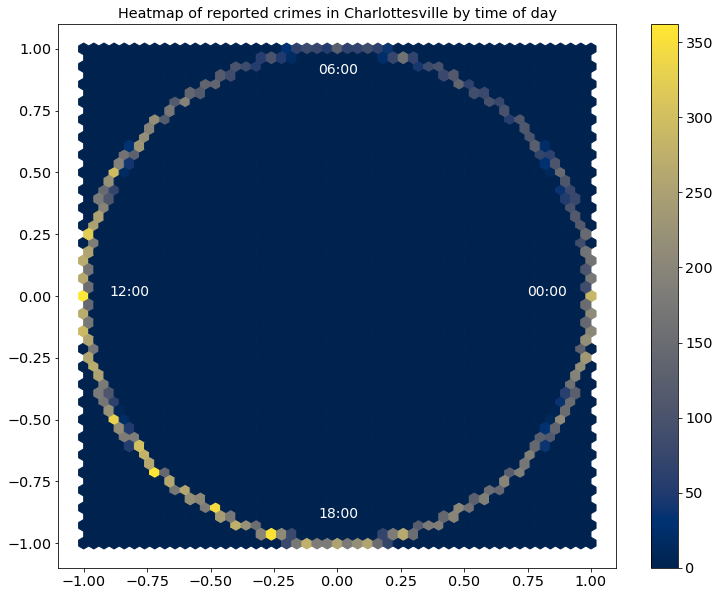

In [21]:
# midnight 0:00 is (cos, sin) = (1, 0)
# 6am 6:00 is (cos, sin) = (0, 1)

plt.figure(figsize=(12.5,10))
plt.hexbin(crime.Time_cos, crime.Time_sin, gridsize=50, cmap='cividis')
plt.title('Heatmap of reported crimes in Charlottesville by time of day')
plt.colorbar()
plt.text(.75, 0, '00:00', fontsize=14, color='white')
plt.text(-.075, .9, '06:00', fontsize=14, color='white')
plt.text(-.9, 0, '12:00', fontsize=14, color='white')
plt.text(-.075, -.9, '18:00', fontsize=14, color='white')
plt.savefig('crime_data-time-heatmap-austin')

In [22]:
crime.head()

,Offense,BlockNumber,StreetName,DateReported,HourReported,BlockString,Address,X,Y,TimeReported,LocalTimeReported,SecondOfDay,Time_cos,Time_sin
0,Assist Citizen - Misc,1600.0,MADISON AVE,2019-07-20T07:17:08.000Z,317,1600,"1600 MADISON AVE, Charlottesville VA",-78.486731,38.041532,2019-07-20 07:17:08,2019-07-20 03:17:08-04:00,11828,0.652319,0.757945
1,Shots Fired/Illegal Hunting,NaN,10TH ST NW / ANDERSON ST,2019-07-20T06:47:42.000Z,247,,"10TH ST NW / ANDERSON ST, Charlottesville VA",-78.502296,38.036433,2019-07-20 06:47:42,2019-07-20 02:47:42-04:00,10062,0.744020,0.668157
2,Shots Fired/Illegal Hunting,800.0,ROSE HILL DR,2019-07-20T06:25:22.000Z,225,800,"800 ROSE HILL DR, Charlottesville VA",-78.469232,38.022255,2019-07-20 06:25:22,2019-07-20 02:25:22-04:00,8722,0.805498,0.592599
3,Suspicious Activity,100.0,MADISON LN,2019-07-20T03:46:00.000Z,2346,100,"100 MADISON LN, Charlottesville VA",-78.492631,38.036610,2019-07-20 03:46:00,2019-07-19 23:46:00-04:00,85560,0.998135,-0.061049
4,Vandalism,800.0,W MAIN ST,2019-07-20T02:36:17.000Z,2236,800,"800 W MAIN ST, Charlottesville VA",-78.490886,38.031661,2019-07-20 02:36:17,2019-07-19 22:36:17-04:00,81377,0.934023,-0.357214


In [23]:
X = crime[['X', 'Y', 'Time_cos', 'Time_sin']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

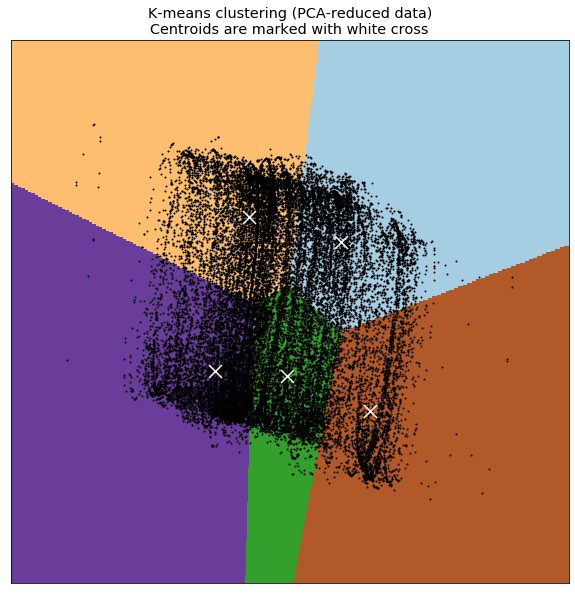

In [24]:
# taken from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
from time import time
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

data = X

n_samples, n_features = data.shape
n_clusters = 5

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 10))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.savefig('clusters')

In [25]:
# need to clean the Offense feature
vals, counts = np.unique(crime.Offense, return_counts=True)
print(len(vals))
sorted(list(zip(vals, counts)), key=lambda x: x[1], reverse=True)

123


[('Assault Simple', 2531),
 ('Hit and Run', 2271),
 ('Towed Vehicle', 2151),
 ('Vandalism', 1804),
 ('Larceny - All Other', 1783),
 ('Assist Citizen - Mental/TDO/ECO', 1701),
 ('Suspicious Activity', 1593),
 ('Drug/Narcotics Violation', 1285),
 ('Lost/FoundProperty', 1141),
 ('Larceny - From Motor Vehicle', 1083),
 ('Found/Recovered Property', 750),
 ('Burglary', 718),
 ('Larceny - Theft from Building', 705),
 ('Larceny - Shoplifitng', 682),
 ('Assault Intimidation', 620),
 ('Fraud-false pretense', 496),
 ('Assault Aggravated', 486),
 ('Disorderly Conduct', 464),
 ('Animal Complaint', 422),
 ('Driving Under the Influence', 416),
 ('Runaway', 349),
 ('Misc - Criminal Call', 330),
 ('Motor Vehicle Theft', 312),
 ('Fraud-credit card', 289),
 ('Missing Person-juvenile', 270),
 ('Larceny - Of Veh Parts/Access', 252),
 ('Death Investigation - DOA', 247),
 ('Accident - w/out Injuries', 221),
 ('Shots Fired/Illegal Hunting', 220),
 ('Comm Relations Initiative - CRI', 219),
 ('Trespass', 201),


In [26]:
assault = ['Assault Simple', 'Assault Intimidation', 'Assault Aggravated', 'Kidnap/Abduction', 'Homicide-murder/non-negligent']
driving = ['Hit and Run', 'Driving Under the Influence', 'Accident - w/out Injuries', 'Accident w/Injuries',
          'Traffic - Abandoned Vehicle', 'Traffic - Traffic Hazard', 'Traffic Stops', 'Unauthorized Use of Motor Veh']
disorder = ['Vandalism', 'Suspicious Activity', 'Disorderly Conduct',
           'Shots Fired/Illegal Hunting', 'Trespass', 'Drunkeness DIP', 'Animal - Bite', 'Weapons Violations',
            'Phone Calls - Threat or Obscene', 'Domestic Disturbance',
           'Missing Person-adult', 'Harassment', 'Phone Calls - Annoying', 'Suicide Investigation',
           'Accident Property Damage', 'Suspicious Person', 'Arson', 'Alarm - Intentional', 'Alarm - True',
           'Bomb Threat', 'Attemped Suicide', 'Child Ab - Contr to Delinquency', 'Child Abuse', 'Curfew/Loitering/Vagrancy',
            'Death Investigation - DOA', 'Disturbance - Non Domestic', 'Juvenile Investigation', 
            'Littering/Illegal Dumping', 'Missing Person-juvenile', 'Noise Complaint', 'Runaway',
            'Stop w/Search/Frisk', 'Stop w/o Search/Frisk', 'Suspicious Vehicle',]
drugs = ['Drug/Narcotics Violation', 'Narcotics', 'Drug Investigation', 'Drug Equipment Violation', 'Liquor Law Violation',]
theft = ['Larceny - All Other', 'Larceny - From Motor Vehicle', 'Burglary', 'Larceny - Theft from Building',
        'Larceny - Shoplifitng', 'Motor Vehicle Theft', 'Larceny - Of Veh Parts/Access', 'Robbery/Conversion',
        'Stolen Property Offenses', 'Larceny - Pocket Picking', 'Robbery - Strong Arm', 'Robbery - Armed',
        'Larceny - Purse Snatching', 'Extortion/Blackmail', 'Larceny - From Coin Oper Device']
fraud = ['Fraud-false pretense', 'Fraud-impersonation', 'Forgery/Counterfeiting', 'Embezzelment', 'Identity Theft',
        'Fraud-credit card', 'Bad Check', 'Fraud-welfare', 'Fraud-wire fraud', 'Impersonating a Police Officer',]
sex = ['Sex Offense - Forcible Rape', 'Sex Offense-forcible fondling', 'Sex Offense', 
       'Sex Offense - Forcible Sodomy', 'Pornography', 'Prowler - Peeping  Tom', 'Stalking', 'Prostitution',
       'Prostitution-assisting/promoting', 'Sex Offense - Assault w/Object', 'Sex Offense-statutory rape',]
full_cats = [assault, driving, disorder, drugs, theft, fraud, sex]
full_cat_names = ['assault', 'driving', 'disorder', 'drugs', 'theft', 'fraud', 'sex']

In [27]:
all_full_cats = []
for full_cat in full_cats:
    for cat in full_cat:
        all_full_cats.append(cat)
set(vals) - set(all_full_cats)

{'Accident Private Property',
 'Alarm - Unknown',
 'Alarm - Weather Related',
 'Alarm-Accidental',
 'Animal Complaint',
 'Assist',
 'Assist Agency - Arrest/warrant',
 'Assist Agency - Backup/Assist',
 'Assist Agency - Other',
 'Assist Citizen - Medical',
 'Assist Citizen - Mental/TDO/ECO',
 'Assist Citizen - Misc',
 'Assist Citizen - Welfare Check',
 'Assisted on Prev Reported',
 'Civil Problem',
 'Comm Relations Initiative - CRI',
 'Computer Crime',
 'Crime Prevent Initiative - CPI',
 'Crisis Assessment',
 'False Report of Crime',
 'Family Offense - Non-Violent',
 'Field Interview',
 'Fire Alarm - No Fire',
 'Fires Not Arson',
 'Fireworks Violation',
 'Found/Recovered Property',
 'Lost/FoundProperty',
 'Misc - Criminal Call',
 'Misc - Non-Criminal Call',
 'Open Door/Window',
 'Problem Solving Project - PSP',
 'Solicitation illegal w/o permit',
 'Tactical Crime Initiative - TCI',
 'Towed Vehicle',
 'Warrant Service'}

In [28]:
full_cat_dict = dict()
for i in range(len(full_cats)):
    for cat in full_cats[i]:
        full_cat_dict[cat] = full_cat_names[i]
for val in vals:
    if val not in full_cat_dict.keys():
        full_cat_dict[val] = 'noncrime'

In [29]:
crime['Type'] = crime['Offense'].apply(lambda x: full_cat_dict[x])
crime.head()

,Offense,BlockNumber,StreetName,DateReported,HourReported,BlockString,Address,X,Y,TimeReported,LocalTimeReported,SecondOfDay,Time_cos,Time_sin,Type
0,Assist Citizen - Misc,1600.0,MADISON AVE,2019-07-20T07:17:08.000Z,317,1600,"1600 MADISON AVE, Charlottesville VA",-78.486731,38.041532,2019-07-20 07:17:08,2019-07-20 03:17:08-04:00,11828,0.652319,0.757945,noncrime
1,Shots Fired/Illegal Hunting,NaN,10TH ST NW / ANDERSON ST,2019-07-20T06:47:42.000Z,247,,"10TH ST NW / ANDERSON ST, Charlottesville VA",-78.502296,38.036433,2019-07-20 06:47:42,2019-07-20 02:47:42-04:00,10062,0.744020,0.668157,disorder
2,Shots Fired/Illegal Hunting,800.0,ROSE HILL DR,2019-07-20T06:25:22.000Z,225,800,"800 ROSE HILL DR, Charlottesville VA",-78.469232,38.022255,2019-07-20 06:25:22,2019-07-20 02:25:22-04:00,8722,0.805498,0.592599,disorder
3,Suspicious Activity,100.0,MADISON LN,2019-07-20T03:46:00.000Z,2346,100,"100 MADISON LN, Charlottesville VA",-78.492631,38.036610,2019-07-20 03:46:00,2019-07-19 23:46:00-04:00,85560,0.998135,-0.061049,disorder
4,Vandalism,800.0,W MAIN ST,2019-07-20T02:36:17.000Z,2236,800,"800 W MAIN ST, Charlottesville VA",-78.490886,38.031661,2019-07-20 02:36:17,2019-07-19 22:36:17-04:00,81377,0.934023,-0.357214,disorder


In [30]:
crime['Type'].value_counts()

noncrime    7571
disorder    6080
theft       5817
assault     3692
driving     3164
drugs       1437
fraud       1284
sex          322
Name: Type, dtype: int64

In [31]:
len(crime)

29367

In [32]:
crime_offense = crime[crime.Type != 'noncrime']
crime_offense.head()

,Offense,BlockNumber,StreetName,DateReported,HourReported,BlockString,Address,X,Y,TimeReported,LocalTimeReported,SecondOfDay,Time_cos,Time_sin,Type
1,Shots Fired/Illegal Hunting,NaN,10TH ST NW / ANDERSON ST,2019-07-20T06:47:42.000Z,247,,"10TH ST NW / ANDERSON ST, Charlottesville VA",-78.502296,38.036433,2019-07-20 06:47:42,2019-07-20 02:47:42-04:00,10062,0.744020,0.668157,disorder
2,Shots Fired/Illegal Hunting,800.0,ROSE HILL DR,2019-07-20T06:25:22.000Z,225,800,"800 ROSE HILL DR, Charlottesville VA",-78.469232,38.022255,2019-07-20 06:25:22,2019-07-20 02:25:22-04:00,8722,0.805498,0.592599,disorder
3,Suspicious Activity,100.0,MADISON LN,2019-07-20T03:46:00.000Z,2346,100,"100 MADISON LN, Charlottesville VA",-78.492631,38.036610,2019-07-20 03:46:00,2019-07-19 23:46:00-04:00,85560,0.998135,-0.061049,disorder
4,Vandalism,800.0,W MAIN ST,2019-07-20T02:36:17.000Z,2236,800,"800 W MAIN ST, Charlottesville VA",-78.490886,38.031661,2019-07-20 02:36:17,2019-07-19 22:36:17-04:00,81377,0.934023,-0.357214,disorder
5,Assault Aggravated,1300.0,CARLTON AVE,2019-07-20T01:34:28.000Z,2134,1300,"1300 CARLTON AVE, Charlottesville VA",-78.486615,38.038293,2019-07-20 01:34:28,2019-07-19 21:34:28-04:00,77668,0.805066,-0.593185,assault


In [33]:
vals, counts = np.unique(list(crime.Offense[crime.Type == 'noncrime']), return_counts=True)
sorted(list(zip(vals, counts)), key=lambda x: x[1], reverse=True)

[('Towed Vehicle', 2151),
 ('Assist Citizen - Mental/TDO/ECO', 1701),
 ('Lost/FoundProperty', 1141),
 ('Found/Recovered Property', 750),
 ('Animal Complaint', 422),
 ('Misc - Criminal Call', 330),
 ('Comm Relations Initiative - CRI', 219),
 ('Assist Agency - Other', 178),
 ('Assist Agency - Backup/Assist', 138),
 ('Misc - Non-Criminal Call', 131),
 ('Family Offense - Non-Violent', 78),
 ('Warrant Service', 67),
 ('Assist Citizen - Welfare Check', 54),
 ('Crime Prevent Initiative - CPI', 50),
 ('Assist Citizen - Misc', 33),
 ('Fires Not Arson', 30),
 ('Assist Citizen - Medical', 23),
 ('Problem Solving Project - PSP', 16),
 ('Assist Agency - Arrest/warrant', 11),
 ('Accident Private Property', 9),
 ('Crisis Assessment', 5),
 ('Fireworks Violation', 5),
 ('Assisted on Prev Reported', 4),
 ('Computer Crime', 4),
 ('False Report of Crime', 4),
 ('Solicitation illegal w/o permit', 4),
 ('Alarm-Accidental', 2),
 ('Civil Problem', 2),
 ('Open Door/Window', 2),
 ('Tactical Crime Initiative - T

In [34]:
crime_select = crime[['X', 'Y', 'Time_cos', 'Time_sin', 'Type']]
crime_select = crime_select[crime_select['Type'] != 'noncrime']
crime_select.head()

,X,Y,Time_cos,Time_sin,Type
1,-78.502296,38.036433,0.744020,0.668157,disorder
2,-78.469232,38.022255,0.805498,0.592599,disorder
3,-78.492631,38.036610,0.998135,-0.061049,disorder
4,-78.490886,38.031661,0.934023,-0.357214,disorder
5,-78.486615,38.038293,0.805066,-0.593185,assault


In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# pipeline = Pipeline([
#         ('onehot', ColumnTransformer([
#                                       ('num', 'passthrough', slice(4)),
#                                       ('cat', OneHotEncoder(categories='auto'), [4])])),
#         ('std_scaler', StandardScaler()),
#     ])
col_transformer = ColumnTransformer([('num', StandardScaler(), slice(4)),
                                     ('cat', OneHotEncoder(categories='auto'), [4])])
# crime_prep = pipeline.fit_transform(crime_select)
crime_prep = col_transformer.fit_transform(crime_select)
crime_prep

array([[-1.14880625,  0.30525951,  1.17146959, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.40630525, -0.94989098,  1.25571416, ...,  0.        ,
         0.        ,  0.        ],
       [-0.4019626 ,  0.32088752,  1.51969127, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.56025606, -0.91959809,  0.30704068, ...,  0.        ,
         0.        ,  0.        ],
       [-0.78378988,  0.64833748, -0.10955715, ...,  0.        ,
         0.        ,  0.        ],
       [-0.01943982,  0.40533933, -0.19118925, ...,  0.        ,
         0.        ,  0.        ]])

In [36]:
# onehot_names = list(pipeline['onehot'].named_transformers_['cat'].get_feature_names())
onehot_names = list(col_transformer.named_transformers_['cat'].get_feature_names())
cols = ['X', 'Y', 'Time_cos', 'Time_sin'] + onehot_names

In [37]:
X_mean, Y_mean = col_transformer.named_transformers_['num'].mean_[:2]
X_var, Y_var = col_transformer.named_transformers_['num'].var_[:2]
X_stdev, Y_stdev = np.sqrt(X_var), np.sqrt(Y_var)

cos_mean, sin_mean = col_transformer.named_transformers_['num'].mean_[2:4]
cos_var, sin_var = col_transformer.named_transformers_['num'].var_[2:4]
cos_stdev, sin_stdev = np.sqrt(cos_var), np.sqrt(sin_var)

In [38]:
crime_prep = pd.DataFrame(crime_prep, columns=cols)
crime_prep.head()

,X,Y,Time_cos,Time_sin,x0_assault,x0_disorder,x0_driving,x0_drugs,x0_fraud,x0_sex,x0_theft
0,-1.148806,0.305260,1.171470,1.316862,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.406305,-0.949891,1.255714,1.200359,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.401963,0.320888,1.519691,0.192500,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.267094,-0.117215,1.431836,-0.264156,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.062976,0.469873,1.255123,-0.628000,1.0,0.0,0.0,0.0,0.0,0.0,0.0


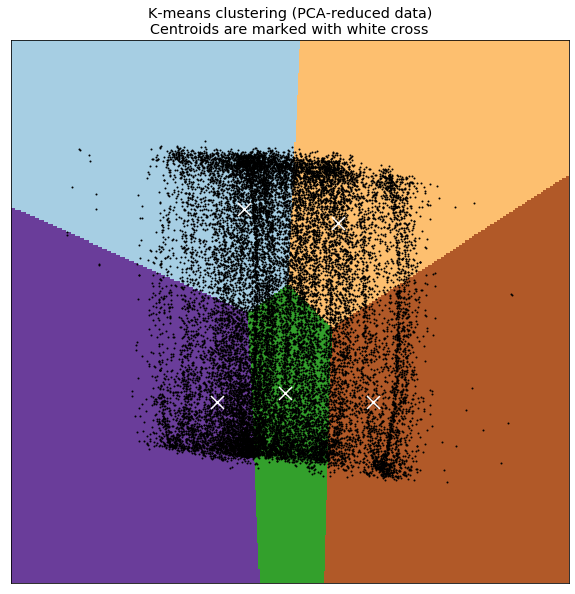

In [39]:
# adapted from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
from time import time
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

data = crime_prep

n_samples, n_features = data.shape
n_clusters = 5

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 10))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.savefig('clusters')

In [40]:
crime_prep.columns

Index(['X', 'Y', 'Time_cos', 'Time_sin', 'x0_assault', 'x0_disorder',
       'x0_driving', 'x0_drugs', 'x0_fraud', 'x0_sex', 'x0_theft'],
      dtype='object')

C:\Users\auhch\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


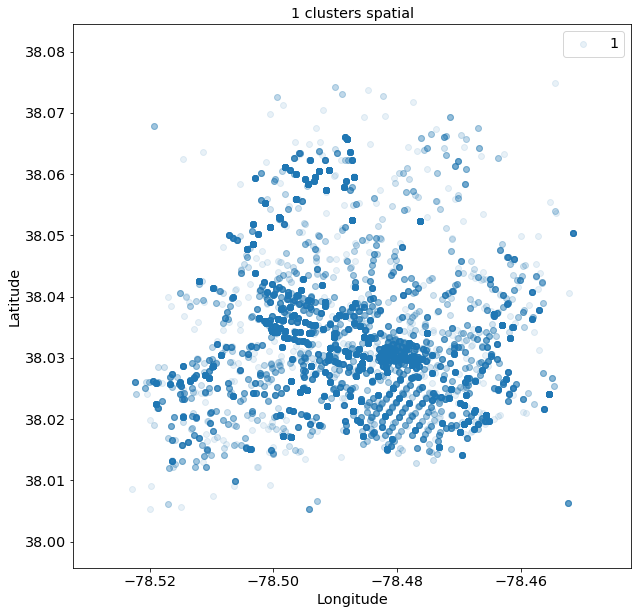

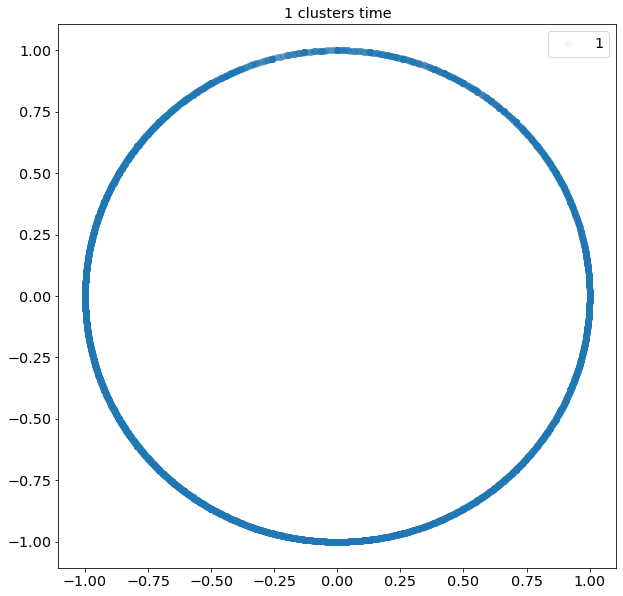

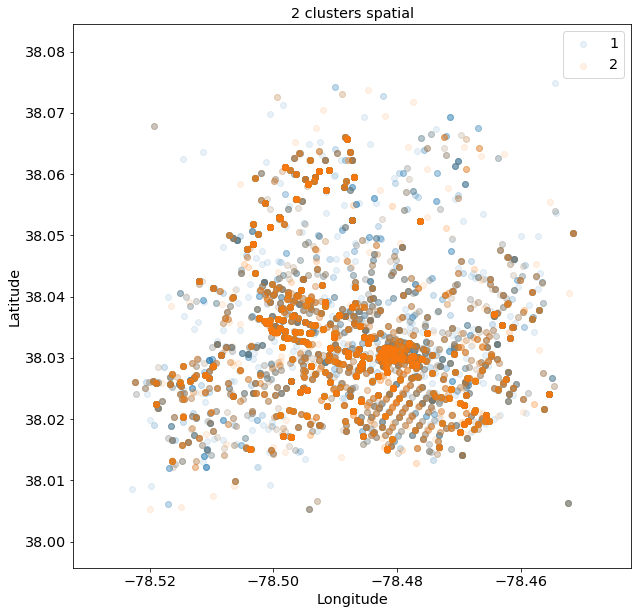

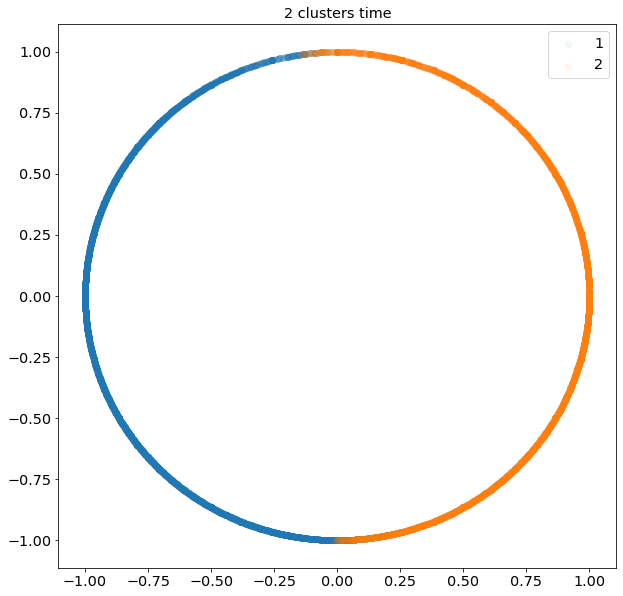

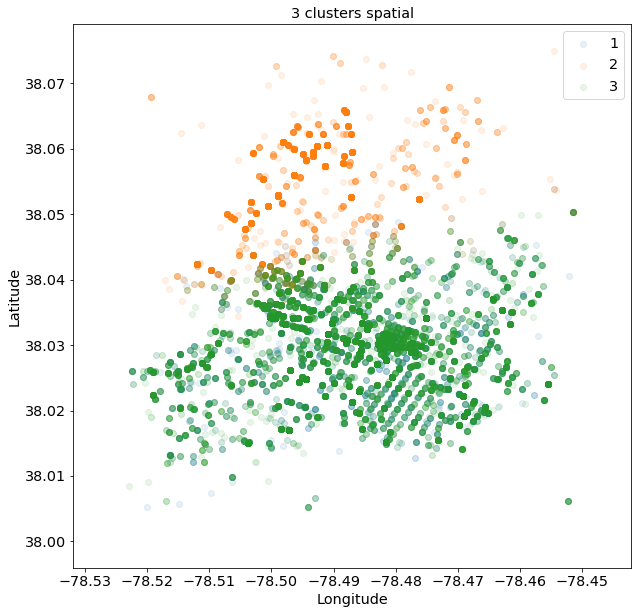

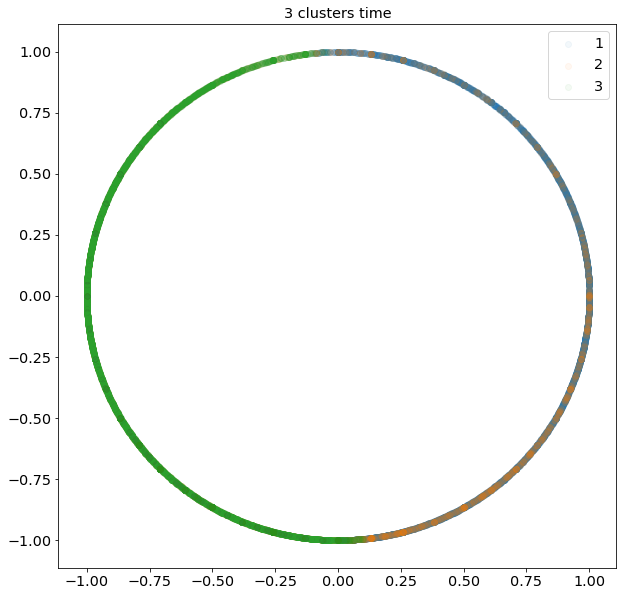

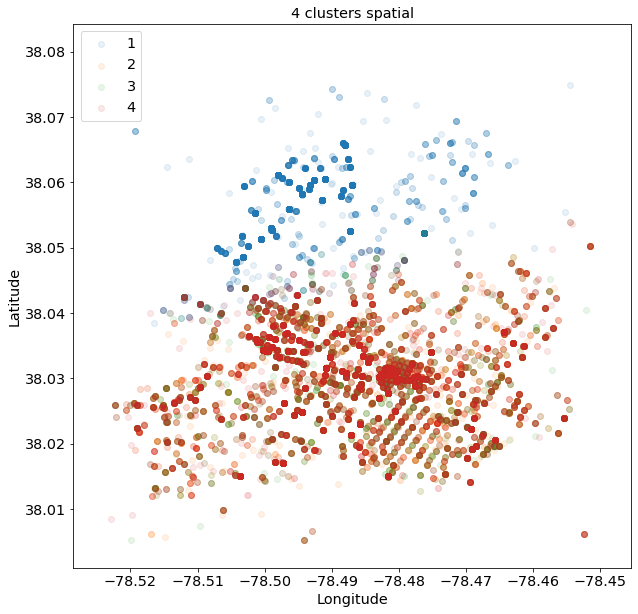

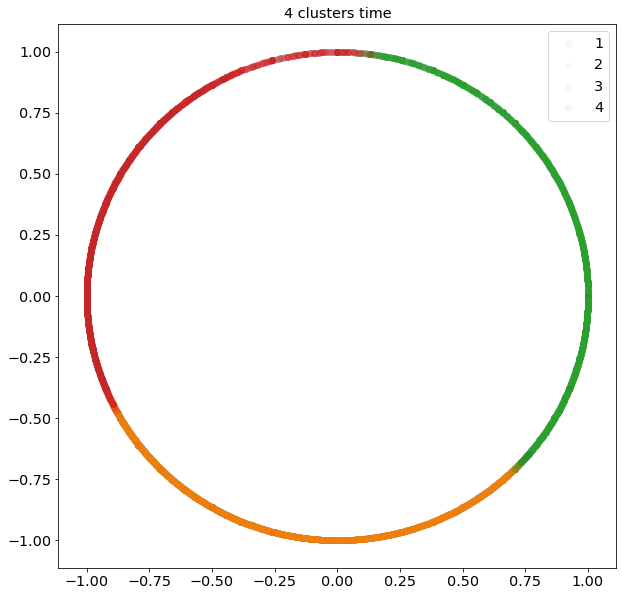

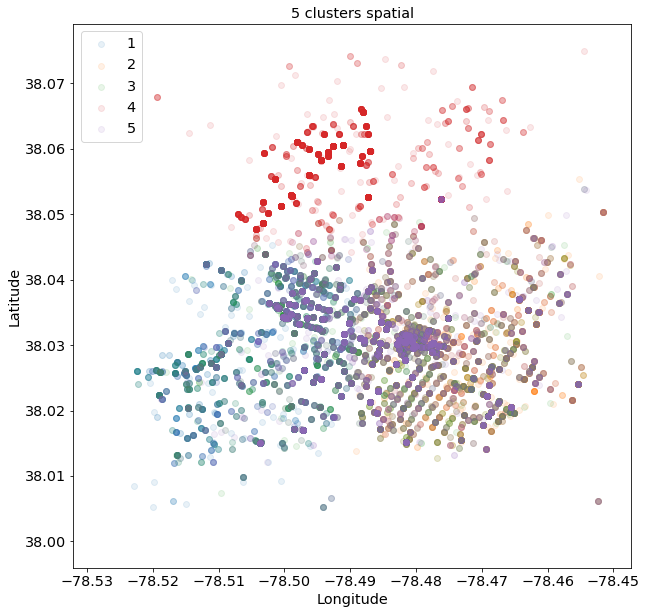

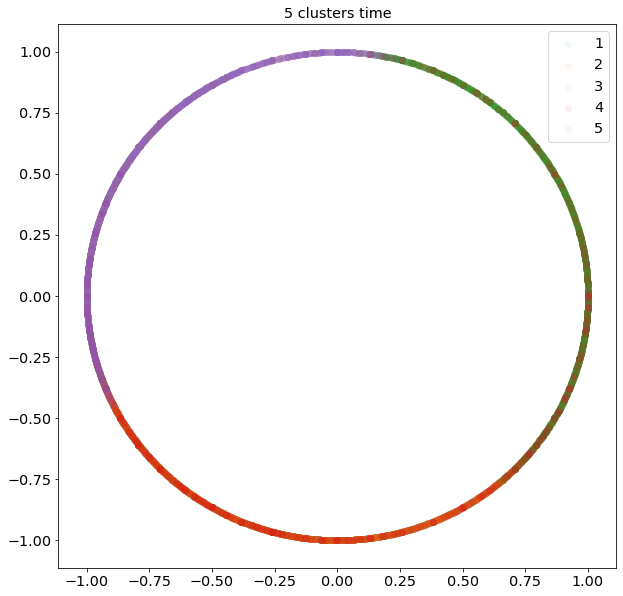

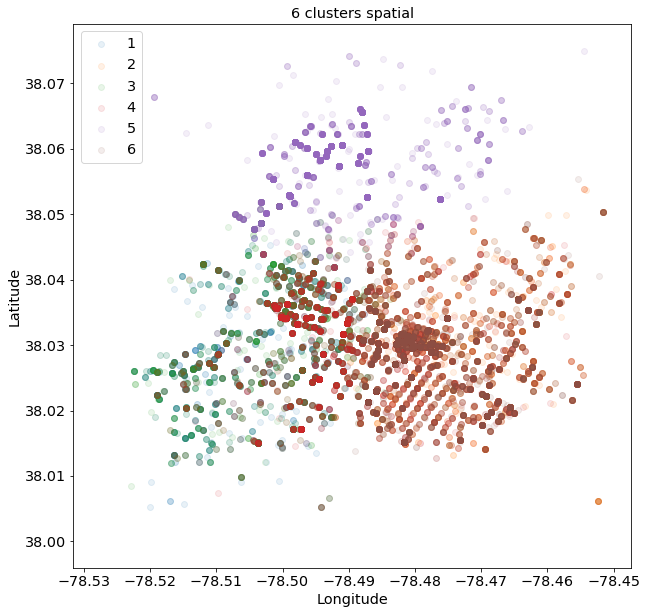

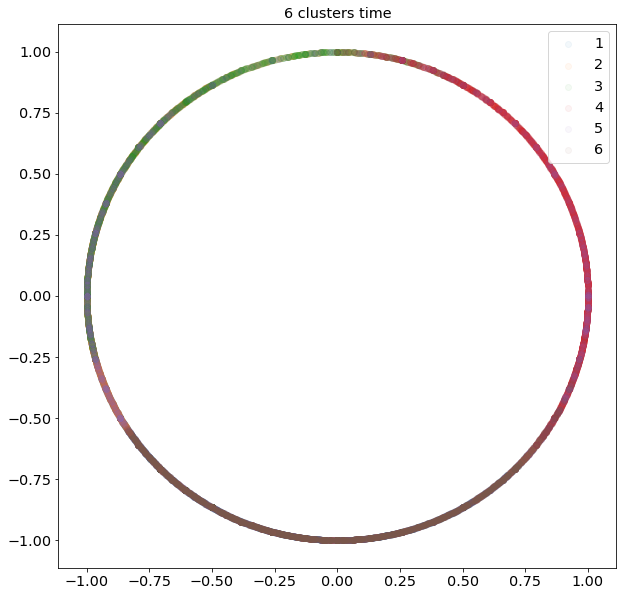

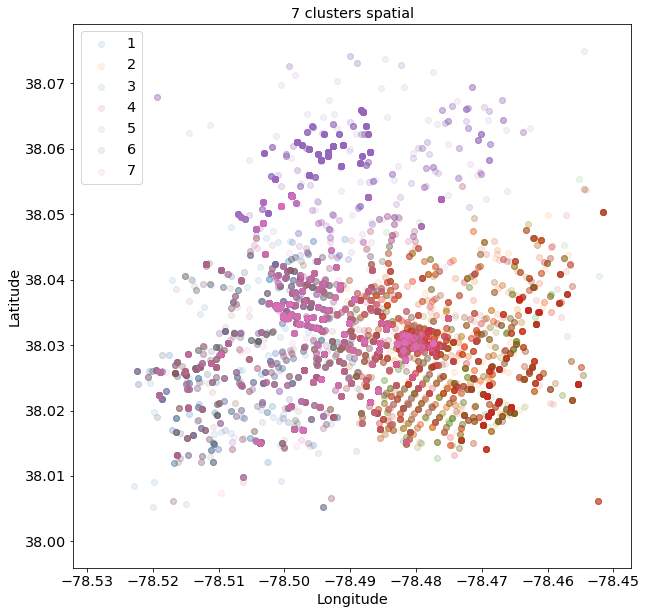

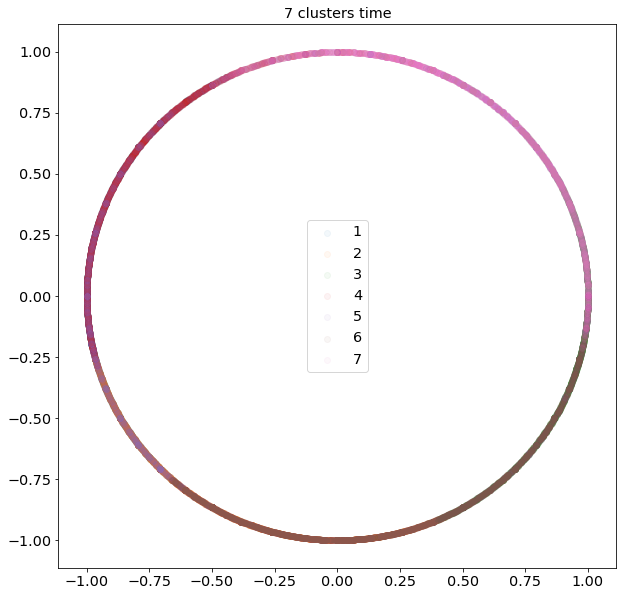

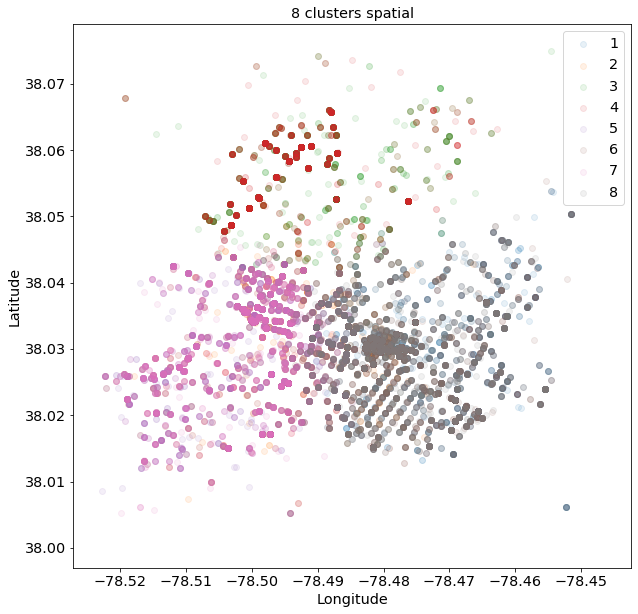

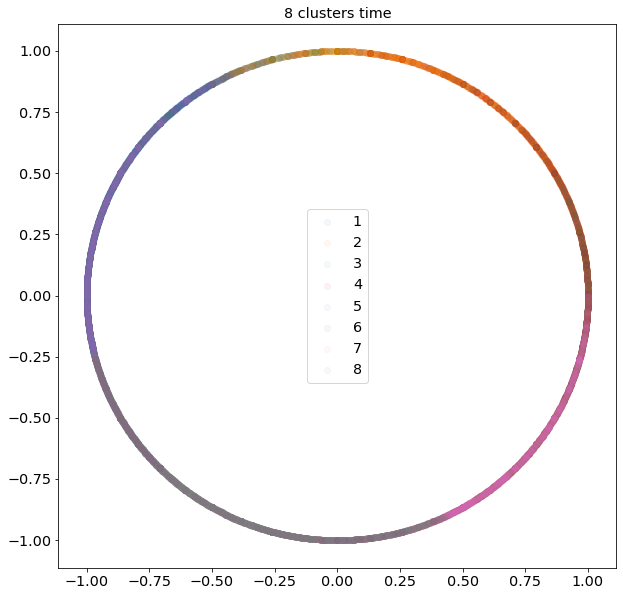

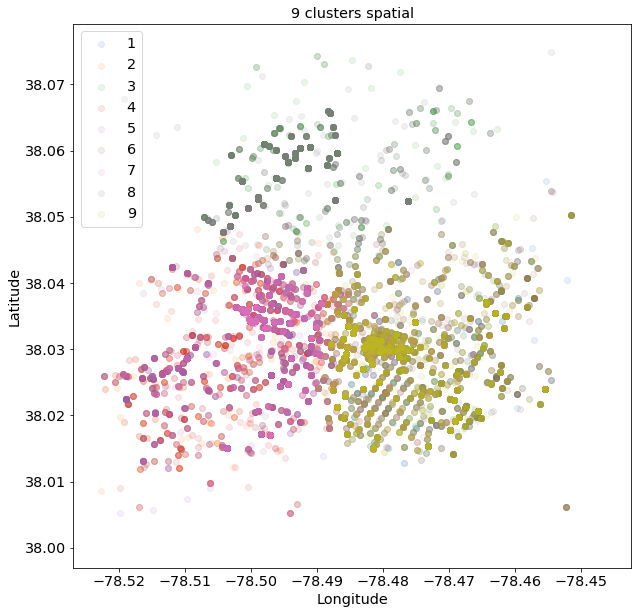

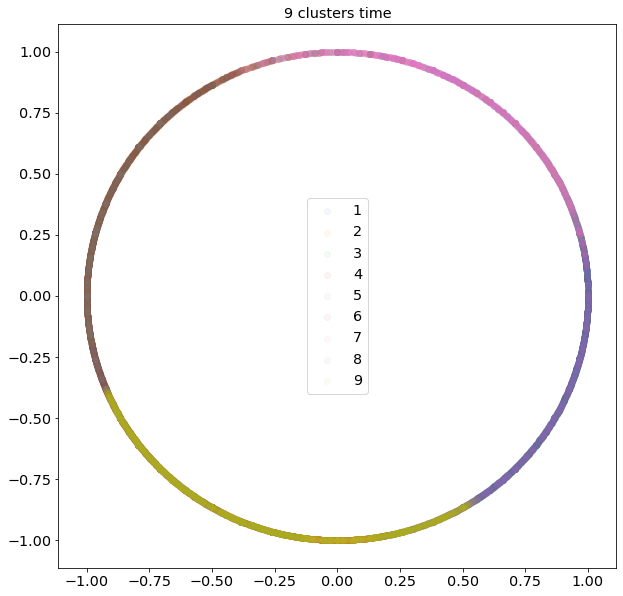

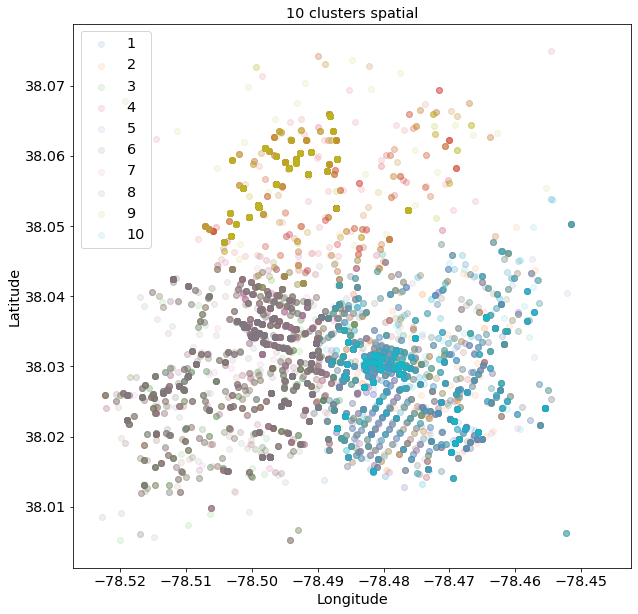

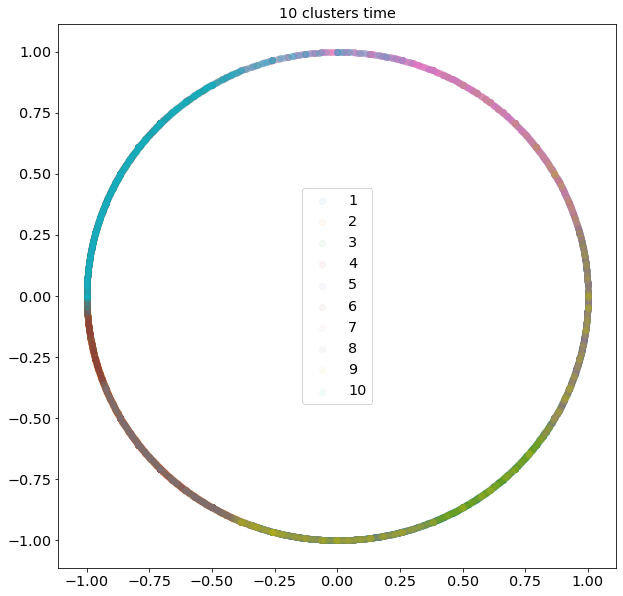

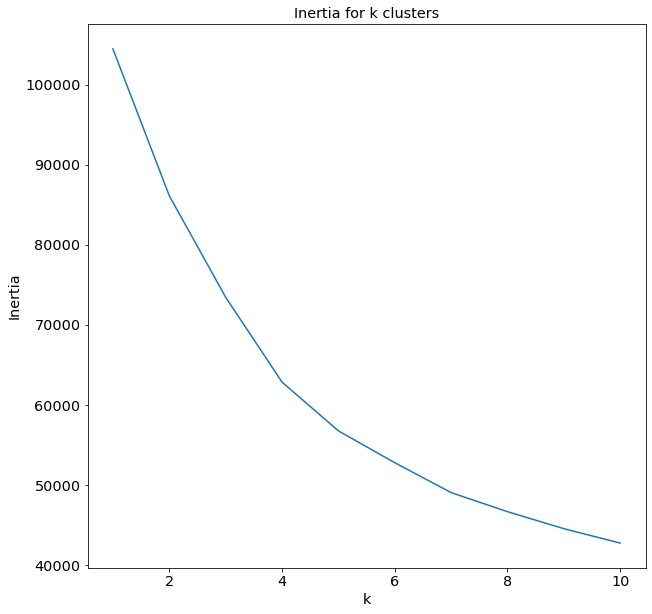

In [41]:
# adapted from https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
inertias = []
means = []
stdevs = []
for k in range(1, 11):
    plt.figure(figsize=(10, 10))
    est = KMeans(n_clusters=k, n_init=5, random_state=42)
    est.fit(crime_prep)
    labels = est.labels_
    inertias.append(est.inertia_)
    for i in range(k):
        this_cluster = crime_prep[labels == i]
        plt.scatter((this_cluster.X*X_stdev)+X_mean,
                    (this_cluster.Y*Y_stdev)+Y_mean, label=i+1, alpha=0.1)
    ax = plt.gca()
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('{} clusters spatial'.format(k))
    plt.legend()
    plt.savefig('{}_clusters_spatial'.format(k))
    
    cluster_means = []
    cluster_stdevs = []
    for cluster_idx in range(k):
        cluster_feature_means = []
        cluster_feature_stdevs = []
        for feature in crime_prep.columns:
            cluster_feature = crime_prep[feature][labels == cluster_idx]
            cluster_feature_means.append(np.mean(cluster_feature))
            cluster_feature_stdevs.append(np.std(cluster_feature))
        cluster_means.append(cluster_feature_means)
        cluster_stdevs.append(cluster_feature_stdevs)
    means.append(cluster_means)
    stdevs.append(cluster_stdevs)
    plt.figure(figsize=(10,10))
    for i in range(k):
        this_cluster = crime_prep[labels == i]
        plt.scatter((this_cluster.Time_cos*cos_stdev)+cos_mean,
                    (this_cluster.Time_sin*sin_stdev)+sin_mean, label=i+1, alpha=0.05)
    plt.legend()
    plt.title('{} clusters time'.format(k))
    plt.savefig('{}_clusters_time'.format(k))

plt.figure(figsize=(10, 10))
plt.plot(range(1, 11), inertias)
plt.title('Inertia for k clusters')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.savefig('inertia')

In [42]:
for i in range(5):
    print('Cluster {}'.format(i+1))
    for x in list(zip(means[4][i], cols)):
        print(x)

Cluster 1
(-1.0236350512995016, 'X')
(-0.293291669898252, 'Y')
(-0.3002932774116314, 'Time_cos')
(-0.7577134801896397, 'Time_sin')
(0.15043791859866049, 'x0_assault')
(0.2622359608449253, 'x0_disorder')
(0.15275631117980423, 'x0_driving')
(0.056156620298815046, 'x0_drugs')
(0.0674909840288511, 'x0_fraud')
(0.01622874806800618, 'x0_sex')
(0.2946934569809377, 'x0_theft')
Cluster 2
(0.8537804144502186, 'X')
(-0.38061381687290474, 'Y')
(-0.09962995698763448, 'Time_cos')
(-0.9275052559279092, 'Time_sin')
(0.1514069718605628, 'x0_assault')
(0.27047459050818984, 'x0_disorder')
(0.1488870222595548, 'x0_driving')
(0.08294834103317934, 'x0_drugs')
(0.07118857622847544, 'x0_fraud')
(0.012389752204955902, 'x0_sex')
(0.2627047459050819, 'x0_theft')
Cluster 3
(0.046902739189666635, 'X')
(-0.32248469004242836, 'Y')
(1.2706680100021641, 'Time_cos')
(0.578752753240019, 'Time_sin')
(0.24701907790143085, 'x0_assault')
(0.30842607313195547, 'x0_disorder')
(0.1534181240063593, 'x0_driving')
(0.082273449920

In [43]:
cross_cluster_stdevs = np.sqrt(np.var(np.array(means[4]), axis=0))
for std, name in zip(cross_cluster_stdevs, cols):
    print(name, 'standard deviation:', std)

X standard deviation: 0.6278301166210597
Y standard deviation: 0.9324750918285759
Time_cos standard deviation: 0.7079423790920947
Time_sin standard deviation: 0.7325271339210475
x0_assault standard deviation: 0.041856424018871505
x0_disorder standard deviation: 0.018194876613663563
x0_driving standard deviation: 0.01649841058268986
x0_drugs standard deviation: 0.014769430246998705
x0_fraud standard deviation: 0.020053877406744008
x0_sex standard deviation: 0.0018432029650905586
x0_theft standard deviation: 0.0554193679816185


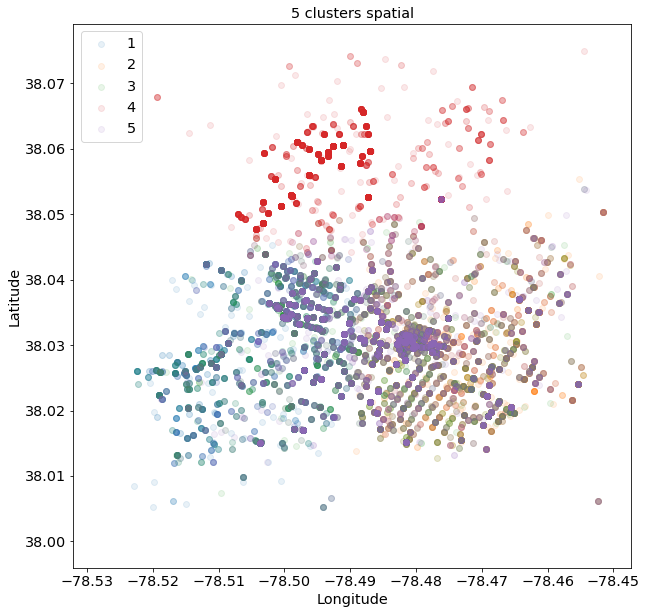

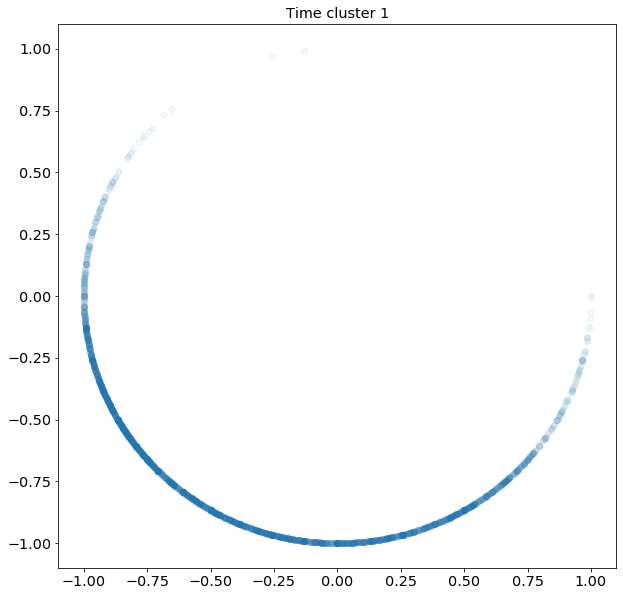

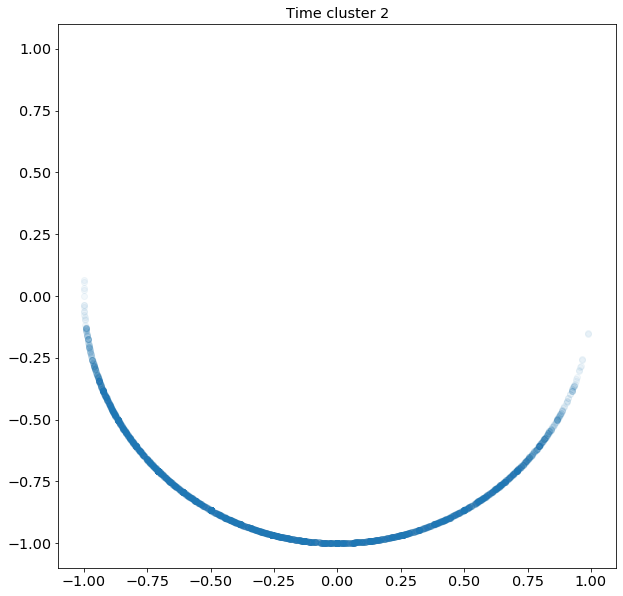

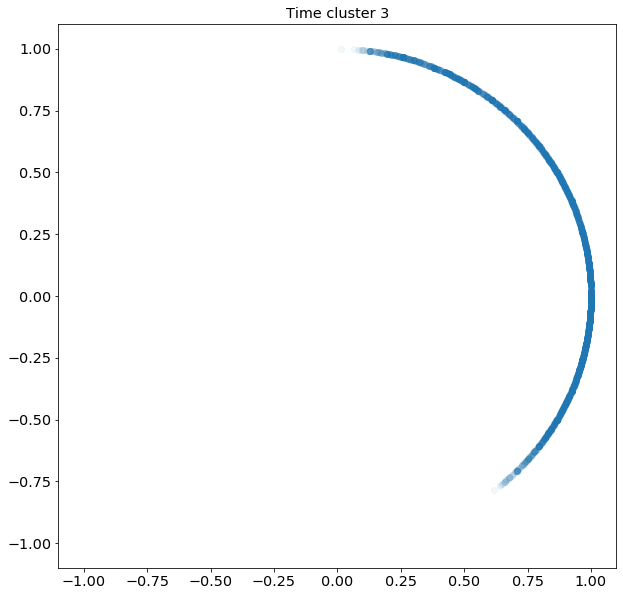

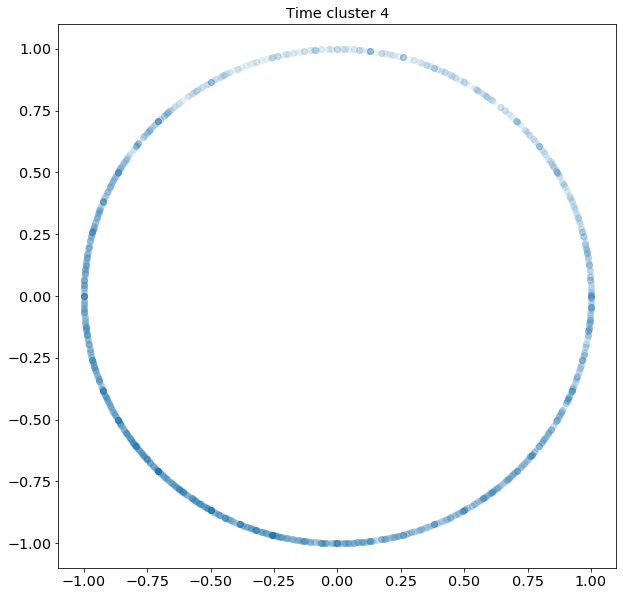

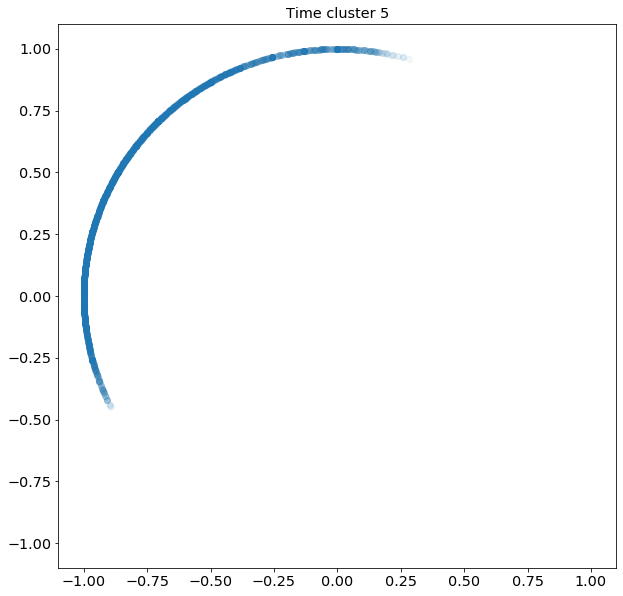

In [44]:
# adapted from https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
k = 5
plt.figure(figsize=(10, 10))
est = KMeans(n_clusters=k, n_init=5, random_state=42)
est.fit(crime_prep)
labels = est.labels_
inertias.append(est.inertia_)
for i in range(k):
    this_cluster = crime_prep[labels == i]
    plt.scatter((this_cluster.X*X_stdev)+X_mean,
                (this_cluster.Y*Y_stdev)+Y_mean, label=i+1, alpha=0.1)
ax = plt.gca()
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('{} clusters spatial'.format(k))
plt.legend()
plt.savefig('{}_clusters_spatial'.format(k))


for i in range(k):
    plt.figure(figsize=(10,10))
    plt.xlim((-1.1, 1.1))
    plt.ylim((-1.1, 1.1))
    this_cluster = crime_prep[labels == i]
    plt.scatter((this_cluster.Time_cos*cos_stdev)+cos_mean,
                (this_cluster.Time_sin*sin_stdev)+sin_mean, label=i+1, alpha=0.05)
    plt.title('Time cluster {}'.format(i+1))
    plt.savefig('time_cluster{}'.format(i+1))

In [45]:
cluster_means = []
cluster_stdevs = []
for cluster_idx in range(5):
    cluster_feature_means = []
    cluster_feature_stdevs = []
    for feature in crime_prep.columns:
        cluster_feature = crime_prep[feature][labels == cluster_idx]
        cluster_feature_means.append(np.mean(cluster_feature))
        cluster_feature_stdevs.append(np.std(cluster_feature))
    cluster_means.append(cluster_feature_means)
    cluster_stdevs.append(cluster_feature_stdevs)

In [47]:
np.mean(cluster_means, axis=0)

array([-0.07421153,  0.15023596, -0.01466425, -0.06295331,  0.16864442,
        0.27631282,  0.14738746,  0.06490308,  0.06084012,  0.01478228,
        0.26712982])